# NAPARI TUTORIAL 
The purpose of this notebook is to provide a brief overview of the relevant syntax for using napari in the context of this project. Methods mentioned are as follows: 
1. Adding an image layer
2. Adding a points layer
3. Adding a tracks layer
4. Taking screenshots of a Napari

Moreover, a few additional parameters for each layer have been discussed and a link to finding more details of the parameter has been mentioned. 

In [1]:
from IPython.display import display
import napari 
from skimage import io
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/Final/data/spots_c3_all.pkl'
spots_df = pd.read_pickle(path)

### Tutorial Dataset 

In [3]:
high_amplitude_df = spots_df[spots_df['amplitude'] > 350]
high_amplitude_df.head()

,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame
67,408.000000,143.0,151.0,2.0,2.0,1.0,4.0,0
91,378.490723,147.0,122.0,5.0,1.0,1.0,3.0,0
149,354.000000,92.0,98.0,14.0,2.0,1.0,2.0,0
159,374.000000,135.0,179.0,15.0,2.0,1.0,3.0,0
163,377.333333,97.0,220.0,16.0,2.0,1.0,3.0,0


In [4]:
path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/Final/data/track_df_updated.pkl'
track_df = pd.read_pickle(path)

## Opening a Napari Viewer and adding an image layer to it
For more details: https://napari.org/stable/tutorials/fundamentals/getting_started.html

In [5]:
# Create a napari viewer
viewer = napari.Viewer()

# Replace 'your_file.tif' with the path to your 4D TIFF file
file_path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/Channel3_complete.tif'

# Load the TIFF file using skimage
raw_image_3 = io.imread(file_path)

# Add the 4D stack to the viewer
layer_raw = viewer.add_image(raw_image_3)

# Add Bounding Box
layer_raw.bounding_box.visible = True

## Adding Points 
For more details: https://napari.org/stable/howtos/layers/points.html

In [6]:
points_layer = viewer.add_points(high_amplitude_df[["frame", "mu_z", "mu_y", "mu_x"]], size=3, 
                                name = 'High Amplitude Points', face_color = 'red', symbol = 'ring')

### Accessing Points details from Napari

One way of accessing points data from napari is finding the point on napari and then accessing its coords by 
getting that specific row from numpy array, for example to access point 1014 do the following. 
coords = points_layer.data
coords[1014]

In [7]:
coords = points_layer.data
print(coords[1014])

[ 69.  71. 147. 255.]


## Adding Tracks 
For more details: https://napari.org/stable/howtos/layers/tracks.html

In [8]:
tracks_layer = viewer.add_tracks(track_df[["track_id", "frame", "mu_z", "mu_y", "mu_x"]], name = 'all_tracks')

## Taking a screenshot in napari 
For more details: https://napari.org/stable/gallery/to_screenshot.html

([], [])

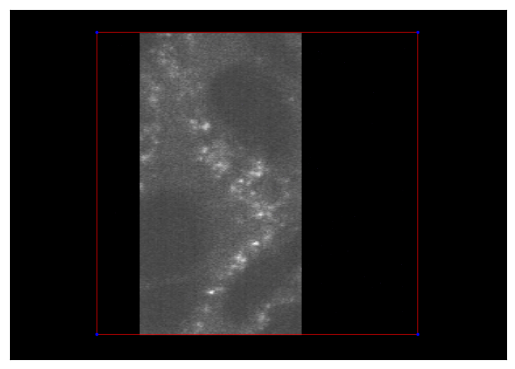

In [9]:
viewer.dims.current_step = (0., 21., 144., 113.)
plt.imshow(viewer.screenshot())
plt.xticks([])
plt.yticks([])